In [ ]:
Simport tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train='/content/drive/MyDrive/Intern/Leather Defect Classification/Train'

In [ ]:
test='/content/drive/MyDrive/Intern/Leather Defect Classification/test'

In [ ]:
valid='/content/drive/MyDrive/Intern/Leather Defect Classification/test'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' )

Found 96 images belonging to 6 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' )

Found 48 images belonging to 6 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory(
    valid,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' )

Found 48 images belonging to 6 classes.


In [ ]:
def create_resnet_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 6

In [ ]:
resnet_model = create_resnet_model(input_shape, num_classes)


94765736/94765736 [==============================] - 6s 0us/step


In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_resnet = resnet_model.fit(train_generator, epochs=30, validation_data=valid_generator)


Epoch 1/30
3/3 [==============================] - 76s 23s/step - loss: 2.0410 - accuracy: 0.1667 - val_loss: 1.8630 - val_accuracy: 0.1667
Epoch 2/30
3/3 [==============================] - 1s 303ms/step - loss: 1.8314 - accuracy: 0.1667 - val_loss: 1.7964 - val_accuracy: 0.1667
Epoch 3/30
3/3 [==============================] - 1s 291ms/step - loss: 1.8084 - accuracy: 0.1146 - val_loss: 1.8162 - val_accuracy: 0.1667
Epoch 4/30
3/3 [==============================] - 1s 300ms/step - loss: 1.8237 - accuracy: 0.0729 - val_loss: 1.8278 - val_accuracy: 0.1667
Epoch 5/30
3/3 [==============================] - 1s 288ms/step - loss: 1.8288 - accuracy: 0.1667 - val_loss: 1.8248 - val_accuracy: 0.1667
Epoch 6/30
3/3 [==============================] - 1s 310ms/step - loss: 1.8247 - accuracy: 0.1667 - val_loss: 1.8116 - val_accuracy: 0.1667
Epoch 7/30
3/3 [==============================] - 1s 294ms/step - loss: 1.8099 - accuracy: 0.1771 - val_loss: 1.7978 - val_accuracy: 0.1667
Epoch 8/30
3/3 [=====

In [ ]:
class_names = list(valid_generator.class_indices.keys())
print("Class Names:", class_names)


Class Names: ['Folding_marks', 'Gain_off', 'Growth_marks', 'Loose_grains', 'Non_defect', 'Pin_hole']


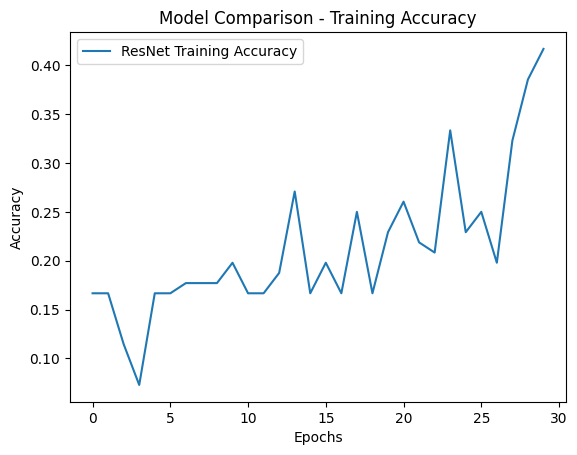

In [ ]:
plt.plot(history_resnet.history['accuracy'], label='ResNet Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Training Accuracy')
plt.legend()
plt.show()

#RESNET MODEL

1/1 [==============================] - 1s 859ms/step


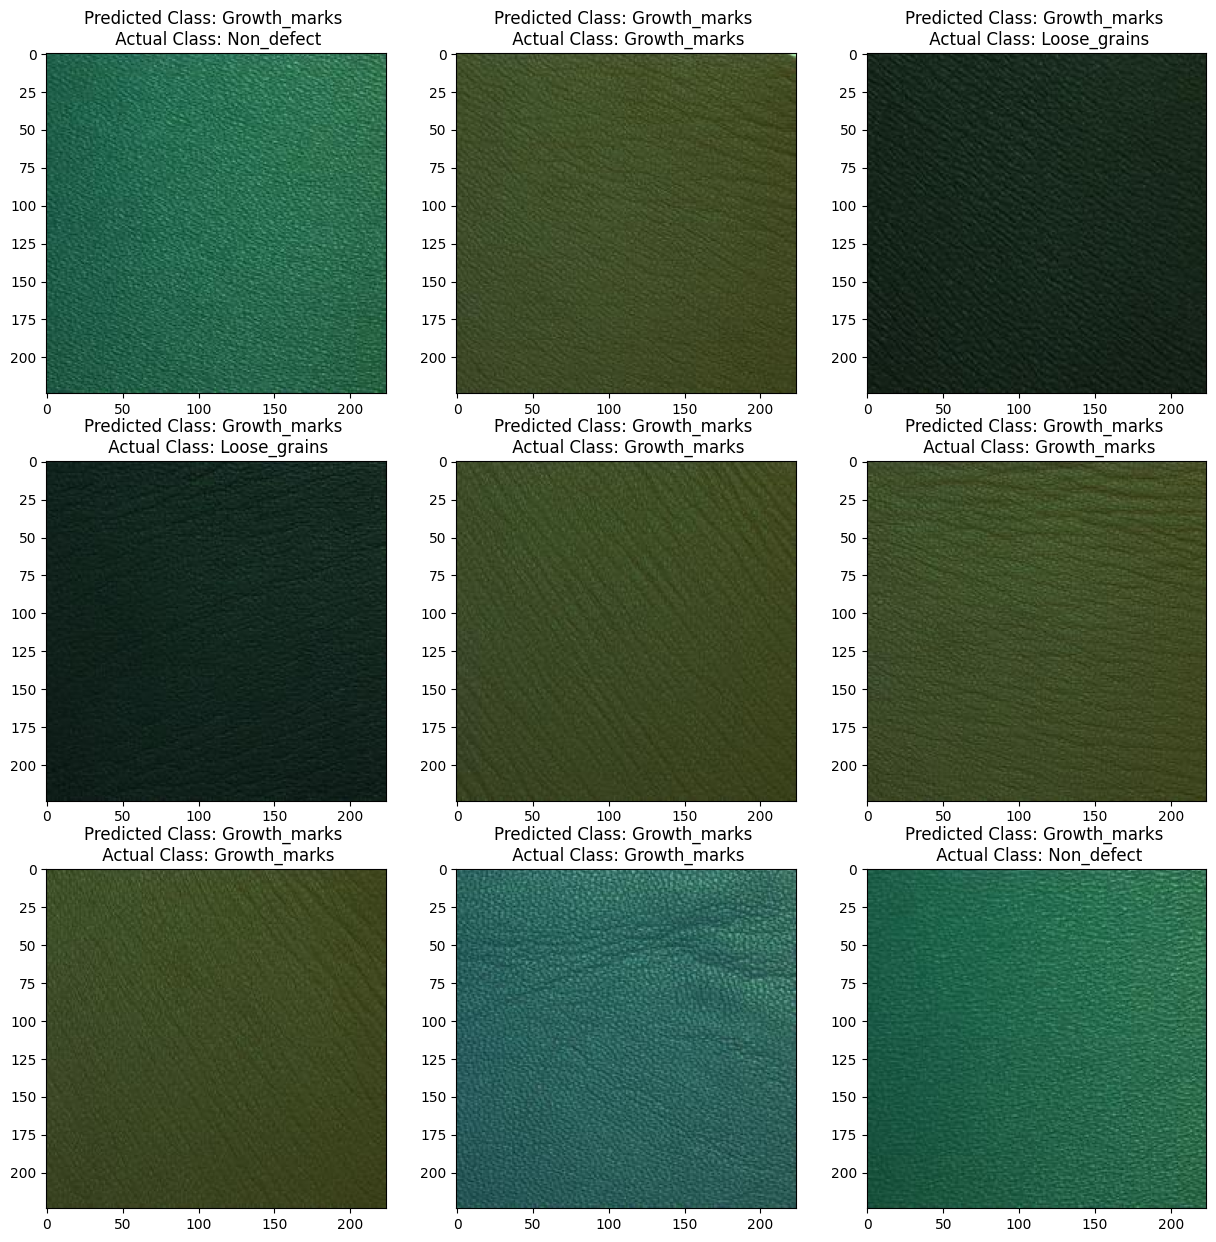

In [ ]:


batch_x,batch_y=next(test_generator)
# Convert the list of images into a numpy array
test_images = np.array(batch_x)

# Now you can use these images for prediction
predictions = resnet_model.predict(test_images)

# Get the class names from the generator
class_names = list(test_generator.class_indices.keys())

# Print the predictions for the first 5 images
plt.figure(figsize=(15,15))
for i in range(9):
  k=class_names[np.argmax(predictions[i])]
  #print(f"Image {i+1}: {k}")
  plt.subplot(3,3,i+1)
  image = batch_x[i]
  actual_label=batch_y[i]
  actual_label=list(actual_label).index(max(actual_label))
  label_index = predictions[i].argmax()
  predicted_class = k
  plt.imshow(image)
 # plt.title(class_names[actual_label])
  plt.title(f"Predicted Class: {predicted_class} \n Actual Class: {class_names[actual_label]}")
plt.show()